In [7]:
import numpy as np
np.set_printoptions(precision=3) # only 3 decimals in print
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')
from scipy.integrate import solve_ivp, quad
from scipy.optimize import fsolve
from scipy.spatial.distance import pdist, squareform

plt.rc("axes", labelsize = 11)
plt.rc("xtick", labelsize = 10, top = True, direction="in")
plt.rc("ytick", labelsize = 10, right = True, direction="in")
plt.rc("axes", titlesize = 13)
plt.rc("legend", fontsize = 10, loc = "best")
plt.rc('animation', html='jshtml')

In [14]:
pos_flat = np.loadtxt('ljg12clusters.txt')
positions = pos_flat.reshape(-1,pos_flat.shape[1]//2,2)

In [26]:
class LennardJonesGauss:
    def __init__(self, eps=1.0, r0=1.7, kT=1):
        self.eps = eps
        self.r0 = r0
        self.kT = kT
        self.sigma = 0.02**0.5*r0
    
    def potential(self, r):
        return r**-12 - 2*r**-6 - self.eps*np.exp(-(r-self.r0)**2/(2*self.sigma**2))
    
    def energy(self, pos):
        return np.sum(self.potential(dists))

C:\Users\Jakob\AppData\Local\Temp\ipykernel_44248\3906657657.py:11: RuntimeWarning: divide by zero encountered in power
  return r**-12 - 2*r**-6 - self.eps*np.exp(-(r-self.r0)**2/(2*self.sigma**2))
C:\Users\Jakob\AppData\Local\Temp\ipykernel_44248\3906657657.py:11: RuntimeWarning: invalid value encountered in subtract
  return r**-12 - 2*r**-6 - self.eps*np.exp(-(r-self.r0)**2/(2*self.sigma**2))


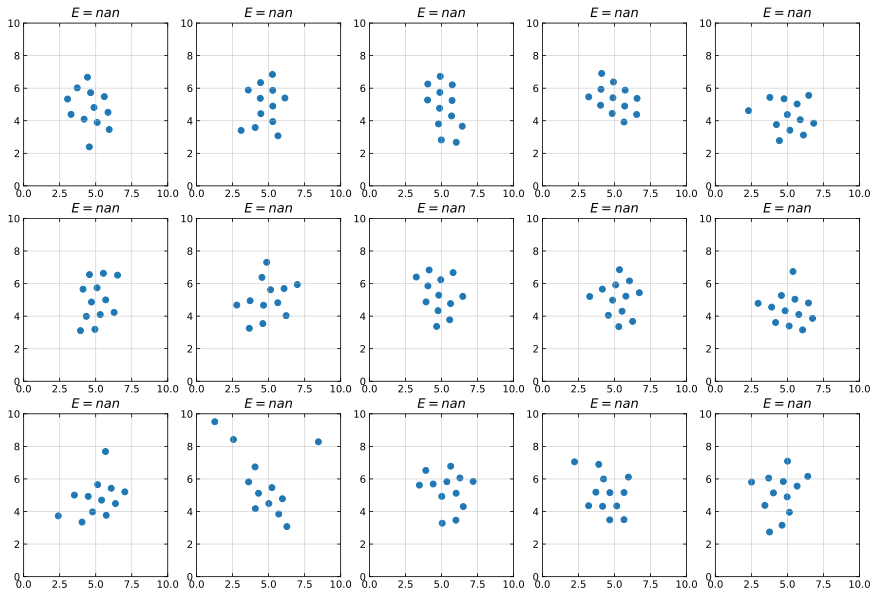

In [28]:
fig, axs = plt.subplots(3, 5, figsize=(15,10))
for (i, ax), pos in zip(enumerate(axs.flatten()), positions):
    ljg = LennardJonesGauss(pos)
    energy = ljg.energy()
    ax.scatter(*positions[i].T)
    ax.set(xlim=(0,10), ylim=(0,10), title=fr'$E = {energy:.2f}$')
    ax.grid(alpha=0.5)

In [29]:
ljg.dists

array([[0.   , 1.936, 2.686, 1.   , 2.202, 3.244, 1.73 , 1.282, 0.983,
        1.945, 0.98 , 1.035],
       [1.936, 0.   , 0.945, 1.691, 3.214, 1.834, 2.547, 3.139, 0.956,
        1.753, 1.623, 2.545],
       [2.686, 0.945, 0.   , 2.618, 3.39 , 0.962, 3.491, 3.95 , 1.775,
        1.703, 2.07 , 3.04 ],
       [1.   , 1.691, 2.618, 0.   , 3.169, 3.404, 0.954, 1.669, 0.954,
        2.529, 1.694, 2.033],
       [2.202, 3.214, 3.39 , 3.169, 0.   , 3.308, 3.919, 2.807, 2.634,
        1.704, 1.658, 1.213],
       [3.244, 1.834, 0.962, 3.404, 3.308, 0.   , 4.325, 4.523, 2.478,
        1.664, 2.413, 3.311],
       [1.73 , 2.547, 3.491, 0.954, 3.919, 4.325, 0.   , 1.688, 1.906,
        3.471, 2.592, 2.718],
       [1.282, 3.139, 3.95 , 1.669, 2.807, 4.523, 1.688, 0.   , 2.193,
        3.137, 2.181, 1.67 ],
       [0.983, 0.956, 1.775, 0.954, 2.634, 2.478, 1.906, 2.193, 0.   ,
        1.633, 0.984, 1.727],
       [1.945, 1.753, 1.703, 2.529, 1.704, 1.664, 3.471, 3.137, 1.633,
        0.   , 0.968